<a href="https://colab.research.google.com/github/valeria-edulabs/ai-experts/blob/main/meeting13/Pandas-EDA-Part-3-distributions-correlations-insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15,7)})

In [ ]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Load the data

In [ ]:
url = 'https://storage.googleapis.com/edulabs-public-datasets/athlete_events.zip'

converters = {
    "Sex": lambda s: s == 'M', # return True if Male, false if Female
    "Season": lambda s: s == 'Summer'  # return True if Summer, false if Winter
}
dtypes = {
    "ID": "int32",
    "Age": "Int8",
    "Height": "float32",
    "Weight": "float32",
    "Year": "Int16",
    "Medal": "category"
}
usecols = [
    'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'
]  # all the columns except for "Games" which is redundant

df = pd.read_csv(url, usecols=usecols, converters=converters, dtype=dtypes)

df.rename(columns={"Sex": "male", "Season": "summer"}, inplace=True)
df.rename(columns={col: col.lower() for col in df.columns}, inplace=True)


# Explore ditributions

## Athlete Physical Attributes

For this purpose we are going to drop all the duplicate rows with athletes, and we are going to leave only the first occurence of the same athlete

In [ ]:
athletes = df.drop_duplicates(subset=['id'])

## Distributions

### Explanation


**What Does a Distribution Tell Us?**

A distribution in data analysis describes how values are spread across a dataset. It helps us understand patterns, central tendencies, variability, and potential outliers.

**Key Insights from a Distribution**

**1. Central Tendency (Mean, Median, Mode)**

- Where do most values cluster?

- Example: The average age of medalists in different sports.


**2. Spread (Variance, Standard Deviation, Range, IQR)**

- How dispersed are the values?

- Example: The range of heights in swimming vs. gymnastics—swimmers tend to be taller.


**3. Shape of the Distribution (Symmetry, Skewness, Kurtosis)**

- Symmetric Distribution → Balanced around the mean.

- Right-Skewed (Positive Skew) → More lower values (e.g., ages of young prodigies).

- Left-Skewed (Negative Skew) → More higher values (e.g., weight in heavyweight sports).

- Kurtosis tells if data has many outliers.


**4. Outliers and Anomalies**

- Unusual values that may indicate data errors or exceptional cases.

- Example: A 14-year-old winning an Olympic gold might be an outlier in most sports but common in gymnastics.



### **Standard Deviation (std) vs. Variance (var)**


Both **variance** and **standard deviation** measure the **spread** or **dispersion** of data, but they differ in interpretation.

---

#### **1️⃣ Variance (var)**
- Measures the **average squared deviation** from the mean.
- Formula:  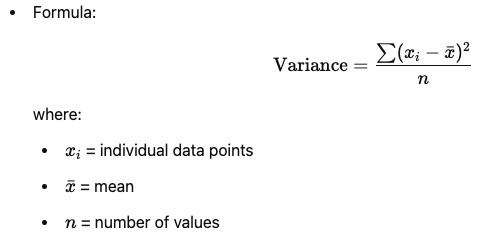

- **Interpretation:**  
  - Higher variance → Data points are more spread out.  
  - Lower variance → Data points are closer to the mean.  
  - **Unit:** Squared units of the original data (e.g., cm² for height).  

---

#### **2️⃣ Standard Deviation (std)**
- Square root of the variance.  
- Formula:  

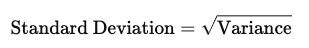

- **Interpretation:**  
  - Expressed in **same units** as the data, making it easier to interpret.  
  - Represents the typical distance of data points from the mean.  

---

### **Variance vs. Standard Deviation: Key Differences**
| Feature | Variance (var) | Standard Deviation (std) |
|---------|--------------|--------------------|
| **Definition** | Average squared deviations from the mean | Square root of variance |
| **Unit** | Squared units of original data | Same as original data |
| **Interpretability** | Less intuitive (e.g., cm² for height) | More intuitive (e.g., cm for height) |
| **Effect of Outliers** | Higher impact | Also affected but easier to compare |

---

### Normal distribution

**📌 What is a Normal Distribution?**  
A **normal distribution** (also called a **Gaussian distribution** or **bell curve**) is a **continuous probability distribution** that is symmetric around its mean. It appears naturally in many real-world scenarios, such as **heights, IQ scores, measurement errors, and stock returns**.

---

**🔹 Key Properties of Normal Distribution**
1. **Symmetric** around the mean (center).
2. **Mean (μ), median, and mode are equal**.
3. **Bell-shaped curve**.
4. **68-95-99.7 Rule** (Empirical Rule):
   - **68%** of the data falls within **1 standard deviation (σ)** of the mean.
   - **95%** falls within **2σ**.
   - **99.7%** falls within **3σ**.
5. **Defined by only two parameters**:  
   - **Mean (μ)** → Determines the center.  
   - **Standard Deviation (σ)** → Determines the spread.

---


**🔹 Real-World Examples**
- **Heights of people** → Most are near the average, fewer are very short or very tall.
- **IQ scores** → The majority are near 100, fewer people have very high or very low IQs.
- **Measurement errors** → Small errors are more common than large errors.



### IQR

### **📌 How to Calculate IQR and Detect Anomalies in Pandas?**  

#### **🔹 Step 1: Understanding IQR (Interquartile Range)**  
The **IQR (Interquartile Range)** measures the **middle 50%** of the data and is calculated as:
\[
IQR = Q3 - Q1
\]
- **Q1 (25th percentile)** → Lower quartile  
- **Q3 (75th percentile)** → Upper quartile  
- **Outliers (Anomalies)** are usually defined as values **below** `Q1 - 1.5*IQR` or **above** `Q3 + 1.5*IQR`

---

### **🔹 Step 2: Calculate IQR & Detect Anomalies in Pandas**
#### ✅ **Example: Detecting Anomalies in "Age" Column**
```python

```

---

### **🔹 Step 3: Handling Anomalies**
#### ✅ **Option 1: Remove Anomalies**
```python
df_no_outliers = df[~df["is_anomaly"]]
```
#### ✅ **Option 2: Replace Anomalies with Median**
```python
median_value = df["age"].median()
df.loc[df["is_anomaly"], "age"] = median_value
```

---

### **📊 Bonus: Visualizing Anomalies**
```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["age"])
plt.title("Boxplot for Age (Outliers Detection)")
plt.show()
```

---

### **📌 Summary**
| **Step** | **Method** |
|----------|-----------|
| Calculate **IQR** | `IQR = Q3 - Q1` |
| Define **outlier thresholds** | `Q1 - 1.5*IQR` (lower), `Q3 + 1.5*IQR` (upper) |
| Detect anomalies | `df["is_anomaly"] = (df["col"] < lower) | (df["col"] > upper)` |
| Remove outliers | `df_no_outliers = df[~df["is_anomaly"]]` |
| Replace anomalies with median | `df.loc[df["is_anomaly"], "col"] = df["col"].median()` |
| Visualize outliers | `seaborn.boxplot()` |

Would you like help analyzing anomalies in your **Olympic dataset**? 🚀

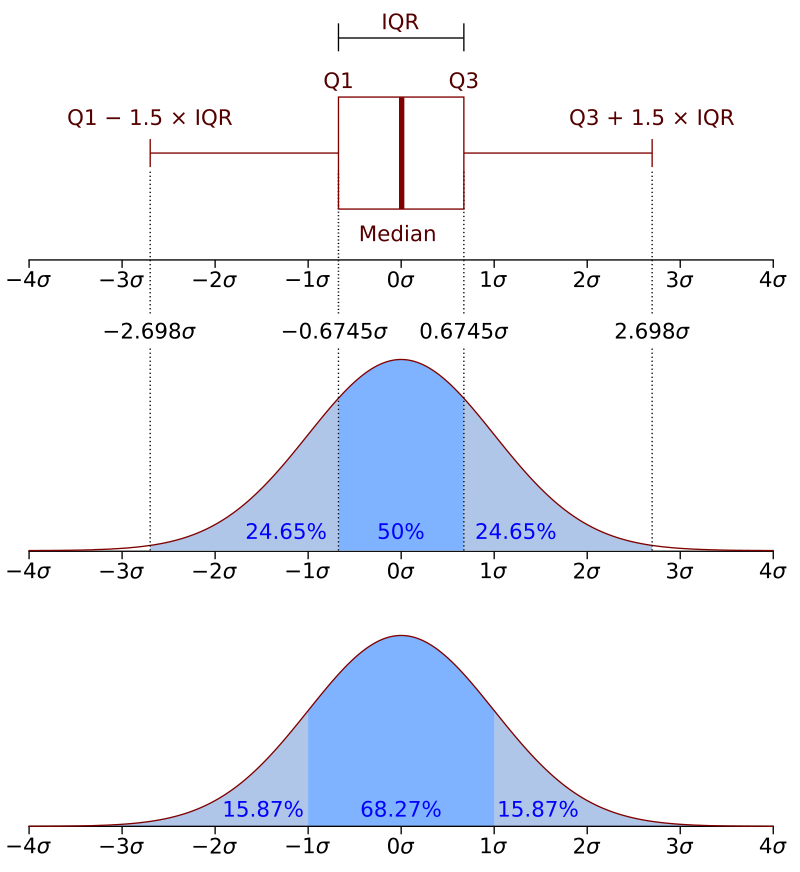

In [ ]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = athletes["age"].quantile(0.25)
Q3 = athletes["age"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for anomalies
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect anomalies
anomalies = (athletes["age"] < lower_bound) | (athletes["age"] > upper_bound)

# Show anomalies
athletes[anomalies]

**❓Exercise: Find amount of anomalies (in terms of age) per sport**

### Code examples

In [ ]:
# distribution over all the athletes
sns.histplot(athletes['height'])

In [ ]:
# distribution in various sports
df['sport'].unique()

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})

In [ ]:
basketball_heights = athletes[athletes['sport'] == 'Basketball']['height']
basketball_heights.agg(['min', 'max', 'mean', 'median', 'var', 'std'])

In [ ]:
sns.histplot(basketball_heights)

In [ ]:
sns.histplot(basketball_heights, kde=True)

In [ ]:
sns.boxplot(basketball_heights)

In [ ]:
curling_heights = athletes[athletes['sport'] == 'Curling']['height']

In [ ]:
curling_heights.agg(['min', 'max', 'mean', 'median', 'var', 'std'])

In [ ]:
sns.histplot(curling_heights, kde=True)

In [ ]:
sns.boxplot(curling_heights)

### Skewed distribution

#### **Is There a Problem with Using Std, IQR, and Other Measures on Skewed Data?**  

Yes! If the **distribution is skewed**, some statistical measures (like the **mean** and **standard deviation**) may **misrepresent** the data. However, other measures (like **median** and **IQR**) are more **robust to skewness**.  

---

#### **1️⃣ Standard Deviation (std) and Skewness**
- **Problem:** Standard deviation assumes **data is symmetrically spread around the mean**.  
- In a **right-skewed** distribution (long tail on the right), **std can be large**, even though most values are on the lower side.  
- In a **left-skewed** distribution (long tail on the left), **std may not reflect the real spread** of most data points.  
- **Sensitive to outliers**: Extreme values inflate std.  

✔ **When to Use?**  
- Works well **if data is symmetric (normal distribution)**.  
- **Not ideal for skewed distributions** because extreme values distort it.  

---

#### **2️⃣ IQR and Skewness**
✔ **IQR is robust to skewness** because it focuses on the **middle 50%** of the data.  
✔ IQR is not affected by **outliers or extreme values**, making it a better measure of spread in skewed data.  



#### **Observations from the Example**
- **Mean is pulled to the right** because of the skewness.  
- **Median is more representative of the data's center.**  
- **IQR is stable**, while **std is inflated** by the long right tail.  

---

#### **Key Takeaways**
| Measure | Works Well If... | Problem in Skewed Data? |
|---------|----------------|-------------------------|
| **Mean** | Symmetric distribution | **Yes** (pulled by outliers) |
| **Median** | Any distribution | No (robust to skewness) |
| **Std Dev** | Symmetric, normal data | **Yes** (inflated by extreme values) |
| **IQR** | Any distribution | No (robust to skewness) |

---

#### **📌 When Data is Skewed, Use:**
✔ **Median instead of Mean** for central tendency.  
✔ **IQR instead of Std** for spread.  
✔ **Box Plots** to visualize skewness and outliers.  

Would you like help analyzing skewness in your dataset? 🚀

#### ❓**Exercise: Find Sport with maximum and minimum variance of: athlete height, weight, age**

[Data visualization fundamentals colab](https://colab.research.google.com/drive/1FUWZu9Q7Eplgiww6H0G7WhBQ-AWqbxec?usp=sharing)

# Relations / corelations

### Scatter plot

In [ ]:
# relation between height / weight
sns.scatterplot(athletes, x='weight', y='height')

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})

In Seaborn, hue is used to color different categories within the same plot. It allows you to distinguish groups based on a categorical variable.



In [ ]:
sns.scatterplot(athletes, x='weight', y='height', hue='sport')

In [ ]:
sns.scatterplot(athletes[athletes['sport'].str.startswith('B')], x='weight', y='height', hue='sport')

In [ ]:
sns.scatterplot(athletes[athletes['sport'].isin(['Basketball', 'Boxing'])], x='weight', y='height', hue='sport')

#### ❓**Exercise**


*   Use scatterplot to see whether there is a correlation between age and height in all the athletes dataset
*   Use scatterplot to see whether there is a correlation between age and weight in all the athletes dataset

Answer the same questions for Hockey athletes



#### ❓**Exercise**


Lets see how athletes physical attributes changed over time.

Plot figures to show whether athletes median age / weight / height changed overtime, **per sport**.



### Using FacetGrids for multiple scatterplots

In [ ]:
g = sns.FacetGrid(athletes, col='sport')

# Plot a scatter plot for each category
g.map(sns.scatterplot, 'age', 'weight')

### Using bins for categorizing numerical data

In [ ]:
pd.cut(athletes['age'], bins=3)

In [ ]:
athletes['age_bin'] = pd.cut(athletes['age'], bins=[0, 15, 20, 30, 40, 50, 97])

In [ ]:
g = sns.FacetGrid(athletes, col='sport', hue='age_bin')

# Plot a scatter plot for each category
g.map(sns.scatterplot, 'age', 'weight' )

In [ ]:
sns.scatterplot(athletes[athletes['sport'] == 'Judo'], x="weight", y="height", hue='age_bin')


## Correlations

### Spearman vs. Pearson Correlation

**Spearman correlation** and **Pearson correlation** are both statistical measures used to quantify the strength and direction of the linear relationship between two variables. However, they differ in their assumptions and applicability.

### Pearson Correlation
* **Assumptions:**
  * Both variables are normally distributed.
  * The relationship between the variables is linear.
* **Calculation:** Measures the covariance between the standardized variables.
* **Interpretation:** A value of 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

### Spearman Correlation
* **Assumptions:**
  * The variables are ordinal or continuous.
  * The relationship between the variables is monotonic (either increasing or decreasing).
* **Calculation:** Measures the correlation between the ranks of the variables.
* **Interpretation:** Similar to Pearson correlation, with values ranging from -1 to 1.

**When to Use Which:**

* **Pearson correlation:** Use when both variables are normally distributed and the relationship is linear.
* **Spearman correlation:** Use when the variables are ordinal or continuous, or when the relationship is non-linear but monotonic.

**Key Differences:**

| Feature | Pearson Correlation | Spearman Correlation |
|---|---|---|
| Assumptions | Normality, linearity | Ordinal or continuous, monotonic |
| Calculation | Covariance of standardized variables | Correlation of ranks |
| Sensitivity to outliers | Sensitive to outliers | Less sensitive to outliers |

In summary, Pearson correlation is suitable for linear relationships between normally distributed variables, while Spearman correlation is more robust to outliers and can handle non-linear monotonic relationships.


In [ ]:
athletes[['weight', 'height', 'age']].corr()

In [ ]:
athletes[['weight', 'height', 'age']].corr('spearman')

In [ ]:
correlation_matrix = athletes.select_dtypes(include=['number', 'bool']).corr()
correlation_matrix

In [ ]:
# viridis: A perceptually uniform sequential colormap that ranges from dark blue to yellow.
# inferno: A perceptually uniform sequential colormap that ranges from dark red to yellow.
# magma: A perceptually uniform sequential colormap that ranges from dark gray to yellow.
# plasma: A perceptually uniform sequential colormap that ranges from dark purple to yellow.
# cividis: A perceptually uniform sequential colormap that ranges from dark blue to yellow.
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()

#### Contingency table - for categorical variables

In [ ]:
# Create contingency table
pd.crosstab(athletes['male'], athletes['summer'])

In [ ]:
pd.crosstab(athletes['male'], athletes['summer'], normalize=True)

In [ ]:
pd.crosstab(athletes['male'], athletes['age_bin'], normalize=True)

# Smart Data imputation

In [ ]:
athletes['height'].isna().sum()

In [ ]:
athletes['height'].plot(kind='hist', bins=50)

In [ ]:
# not so good solution
athletes['height'].fillna(athletes['height'].median()).plot(kind='hist', bins=50)

In [ ]:
athletes.groupby(['event', 'male', 'age_bin'])['height'].transform(lambda x: x.fillna(x.median())).plot(kind='hist', bins=50)

# Analysing other aspects



*   physical attributes vs medals
*   physical attributes vs countries
* amount of athletes vs year / location
* amount of events / sports per year
* amount of medals / athletes per country financial indicators

